# 911 calls capstone project

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style('darkgrid')
import datetime

In [2]:
# read data using the pandas 
data_911 = pd.read_csv("911.csv")

## A. Basic dataset exploration 

In [3]:
# shape of the data 
data_911.shape

(663522, 9)

The pandas .shape attribute returns the overall structure of data in a tuple.

Here there are 663522 rows and 9 columns

In [4]:
# data types of various columns 
data_911.dtypes 

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

The description of the columns are noted down below as available in kaggle

1. lat : latitude 

2. lng : longitude 

3. desc : Description of Emergency

4. zip = zip code 

5. title : Title of Emergency

6. timeStamp : Date and time of the call

7. twp : Township

8. addr : general address

9. e : Index column, always 1

**Looking for mismatch of data types**: lat, lng , zip must be of type string

In [5]:
# using dictionary to convert specific columns
convert_dict = {'lat':str , 'lng': str, 'zip': str} 
data_911 = data_911.astype(convert_dict) # using .astype attribute to convert the sata type 

In [6]:
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   lat        663522 non-null  object
 1   lng        663522 non-null  object
 2   desc       663522 non-null  object
 3   zip        663522 non-null  object
 4   title      663522 non-null  object
 5   timeStamp  663522 non-null  object
 6   twp        663229 non-null  object
 7   addr       663522 non-null  object
 8   e          663522 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 25.3+ MB


In [7]:
data_911['timeStamp'][:10]

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
3    2015-12-10 16:47:36
4    2015-12-10 16:56:52
5    2015-12-10 15:39:04
6    2015-12-10 16:46:48
7    2015-12-10 16:17:05
8    2015-12-10 16:51:42
9    2015-12-10 17:35:41
Name: timeStamp, dtype: object

**convert timeStamp to datetime format**

In [8]:
data_911['timeStamp']=pd.to_datetime(data_911['timeStamp'], format='%Y-%m-%d %H:%M:%S.%f')
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  object        
 1   lng        663522 non-null  object        
 2   desc       663522 non-null  object        
 3   zip        663522 non-null  object        
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 27.8+ MB


In [9]:
#extracting the date and time from timeStamp
data_911['date']=data_911['timeStamp'].dt.date
data_911['time']=data_911['timeStamp'].dt.time
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  object        
 1   lng        663522 non-null  object        
 2   desc       663522 non-null  object        
 3   zip        663522 non-null  object        
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   date       663522 non-null  object        
 10  time       663522 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 32.9+ MB


In [10]:
#from date creating 3 new features which are day, month , year
data_911['date']=data_911['date'].astype('str')

day=[]
month=[]
year=[]
for dates in data_911.index:
    day.append(data_911['date'][dates].split('-')[2])
    month.append(data_911['date'][dates].split('-')[1])
    year.append(data_911['date'][dates].split('-')[0])
    
data_911['day']=day
data_911['month']=month
data_911['year']=year

In [11]:
data_911['month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [12]:
month_convert = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul',
                '08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
data_911['month']=data_911['month'].replace(month_convert)

In [13]:
data_911['month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [14]:
data_911['year'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [15]:
data_911['day'].unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype=object)

In [16]:
data_911['time']=data_911['time'].astype('str')
data_911['time'][:10]

0    17:10:52
1    17:29:21
2    14:39:21
3    16:47:36
4    16:56:52
5    15:39:04
6    16:46:48
7    16:17:05
8    16:51:42
9    17:35:41
Name: time, dtype: object

**Parts of the Day.**

Morning 5 am to 12 pm (noon)

Afternoon 12 pm to 5 pm.

Evening 5 pm to 9 pm.

Night 9 pm to 4 am.

In [17]:
# creating a new feature part of day
hour=[]
for time in data_911.index:
    hour.append(data_911['time'][time].split(':')[0])

data_911['part_of_day'] = hour

In [18]:
data_911['part_of_day'].unique()

array(['17', '14', '16', '15', '18', '19', '20', '21', '22', '23', '00',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13'], dtype=object)

In [19]:
part_of_day_convert = {
    '17':'Evening',
    '14':'Afternoon',
    '16':'Afternoon',
    '15':'Afternoon', 
    '18':'Evening', 
    '19':'Evening', 
    '20':'Evening', 
    '21':'Night', 
    '22':'Night', 
    '23':'Night', 
    '00':'Night',
    '01':'Night', 
    '02':'Night', 
    '03':'Night', 
    '04':'Night', 
    '05':'Morning', 
    '06':'Morning', 
    '07':'Morning', 
    '08':'Morning', 
    '09':'Morning', 
    '10':'Morning', 
    '11':'Morning', 
    '12':'Afternoon',
    '13':'Afternoon'
}

data_911['part_of_day']=data_911['part_of_day'].replace(part_of_day_convert)

In [20]:
data_911['part_of_day'].unique()

array(['Evening', 'Afternoon', 'Night', 'Morning'], dtype=object)

In [21]:
data_911['date']=pd.to_datetime(data_911['date'], format='%Y-%m-%d')
data_911['time']=pd.to_datetime(data_911['time'], format='%H:%M:%S')
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  object        
 1   lng          663522 non-null  object        
 2   desc         663522 non-null  object        
 3   zip          663522 non-null  object        
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   date         663522 non-null  datetime64[ns]
 10  time         663522 non-null  datetime64[ns]
 11  day          663522 non-null  object        
 12  month        663522 non-null  object        
 13  year         663522 non-null  object        
 14  part_of_day  663522 non-null  object        
dtypes: datetime64[ns](3), int64(1), ob

In [22]:
# creating another feature dow( day of week) from date sp that I can later drop the day variable
data_911['dow']= data_911['date'].dt.dayofweek
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  object        
 1   lng          663522 non-null  object        
 2   desc         663522 non-null  object        
 3   zip          663522 non-null  object        
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   date         663522 non-null  datetime64[ns]
 10  time         663522 non-null  datetime64[ns]
 11  day          663522 non-null  object        
 12  month        663522 non-null  object        
 13  year         663522 non-null  object        
 14  part_of_day  663522 non-null  object        
 15  dow          663522 non-null  int6

In [23]:
dow_convert = {'6':'Sun','0':'Mon','1':'Tue','2':'Wed','3':'Thur','4':'Fri','5':'Sat'}

data_911['dow'] = data_911['dow'].astype('str')
data_911['dow'] = data_911['dow'].replace(dow_convert)

data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  object        
 1   lng          663522 non-null  object        
 2   desc         663522 non-null  object        
 3   zip          663522 non-null  object        
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   date         663522 non-null  datetime64[ns]
 10  time         663522 non-null  datetime64[ns]
 11  day          663522 non-null  object        
 12  month        663522 non-null  object        
 13  year         663522 non-null  object        
 14  part_of_day  663522 non-null  object        
 15  dow          663522 non-null  obje

**Drop time,timeStamp,day**

In [24]:
data_911=data_911.drop(['timeStamp','day','time'], axis=1)

In [25]:
data_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  object        
 1   lng          663522 non-null  object        
 2   desc         663522 non-null  object        
 3   zip          663522 non-null  object        
 4   title        663522 non-null  object        
 5   twp          663229 non-null  object        
 6   addr         663522 non-null  object        
 7   e            663522 non-null  int64         
 8   date         663522 non-null  datetime64[ns]
 9   month        663522 non-null  object        
 10  year         663522 non-null  object        
 11  part_of_day  663522 non-null  object        
 12  dow          663522 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 38.0+ MB


In [26]:
data_911.sample(5)# displays any random 5 observations (rows)

,lat,lng,desc,zip,title,twp,addr,e,date,month,year,part_of_day,dow
86568,40.119318,-75.35226870000001,KOHN ST & W AIRY ST; NORRISTOWN; Station 308A...,19401.0,EMS: SUBJECT IN PAIN,NORRISTOWN,KOHN ST & W AIRY ST,1,2016-07-23,Jul,2016,Night,Sat
174036,40.25566,-75.4524733,HALDEMAN RD & DIEBER RD; PERKIOMEN; Station 3...,19473.0,EMS: CARDIAC EMERGENCY,PERKIOMEN,HALDEMAN RD & DIEBER RD,1,2017-03-06,Mar,2017,Morning,Mon
139396,40.0832162,-75.0922116,ELM AVE & HUNTINGDON PIKE; ROCKLEDGE; 2016-12-...,19046.0,Traffic: VEHICLE ACCIDENT -,ROCKLEDGE,ELM AVE & HUNTINGDON PIKE,1,2016-12-04,Dec,2016,Morning,Sun
451208,40.171463,-75.109705,YORK RD & HORSHAM RD; HATBORO; Station 384; 2...,19040.0,EMS: SUBJECT IN PAIN,HATBORO,YORK RD & HORSHAM RD,1,2019-01-24,Jan,2019,Morning,Thur
467732,40.3246615,-75.32748470000001,N MAIN ST & E LINCOLN AVE; TELFORD; 2019-03-04...,18969.0,Traffic: ROAD OBSTRUCTION -,TELFORD,N MAIN ST & E LINCOLN AVE,1,2019-03-04,Mar,2019,Morning,Mon


**Dealing with the missing values**

In [27]:
data_911.isnull().mean()

lat            0.000000
lng            0.000000
desc           0.000000
zip            0.000000
title          0.000000
twp            0.000442
addr           0.000000
e              0.000000
date           0.000000
month          0.000000
year           0.000000
part_of_day    0.000000
dow            0.000000
dtype: float64

**So there is 0.04% missing values in twp**

In [28]:
data_911['twp'].value_counts()

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

**Since LOWER MERION is the undouted mode for twp I can replace the NA values with 'LOWER MERION' in twp column**

In [29]:
data_911['twp'].fillna(value = 'LOWER MERION', inplace = True)

In [30]:
data_911.isnull().mean()

lat            0.0
lng            0.0
desc           0.0
zip            0.0
title          0.0
twp            0.0
addr           0.0
e              0.0
date           0.0
month          0.0
year           0.0
part_of_day    0.0
dow            0.0
dtype: float64

**Searching for duplicated values**

In [31]:
data_911[data_911.duplicated()]

,lat,lng,desc,zip,title,twp,addr,e,date,month,year,part_of_day,dow
823,40.3582695,-75.4431731,UPPER RIDGE RD & PRICE RD; MARLBOROUGH; Stati...,18073.0,EMS: ALTERED MENTAL STATUS,MARLBOROUGH,UPPER RIDGE RD & PRICE RD,1,2015-12-12,Dec,2015,Evening,Sat
836,40.0860099,-75.38714159999999,DEKALB PIKE & CROCKETT RD; UPPER MERION; 2015-...,19406.0,Traffic: DISABLED VEHICLE -,UPPER MERION,DEKALB PIKE & CROCKETT RD,1,2015-12-12,Dec,2015,Evening,Sat
845,40.1330371,-75.40846309999999,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: HEAD INJURY,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,2015-12-12,Dec,2015,Night,Sat
846,40.08732,-75.4050546,N GULPH RD; UPPER MERION; 2015-12-12 @ 21:09:3...,nan,Fire: GAS-ODOR/LEAK,UPPER MERION,N GULPH RD,1,2015-12-12,Dec,2015,Night,Sat
847,40.08732,-75.4050546,N GULPH RD; UPPER MERION; 2015-12-12 @ 21:09:3...,nan,Fire: GAS-ODOR/LEAK,UPPER MERION,N GULPH RD,1,2015-12-12,Dec,2015,Night,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643583,40.149218299999994,-75.3183804,OAK TREE RD & PENN SQUARE RD; EAST NORRITON; 2...,19401.0,Fire: ELECTRICAL FIRE OUTSIDE,EAST NORRITON,OAK TREE RD & PENN SQUARE RD,1,2020-06-03,Jun,2020,Evening,Wed
648409,40.2459473,-75.25068409999999,THOMAS RD & VILSMEIER RD; MONTGOMERY; Station...,19446.0,EMS: FALL VICTIM,MONTGOMERY,THOMAS RD & VILSMEIER RD,1,2020-06-16,Jun,2020,Morning,Tue
648410,40.2459473,-75.25068409999999,THOMAS RD & VILSMEIER RD; MONTGOMERY; Station...,19446.0,EMS: FALL VICTIM,MONTGOMERY,THOMAS RD & VILSMEIER RD,1,2020-06-16,Jun,2020,Morning,Tue
656197,40.021867799999995,-75.3170615,BRYN MAWR AVE; LOWER MERION; 2020-07-09 @ 08:2...,19010.0,Fire: TRANSFERRED CALL,LOWER MERION,BRYN MAWR AVE,1,2020-07-09,Jul,2020,Morning,Thur


In [32]:
data_911.duplicated().sum()

240

It will be better if I can drop the duplicates from the dataset 

In [33]:
data_911.drop_duplicates(inplace=True)
data_911.duplicated().sum()

0

**Hence the duplicated values have been dropped**

## Analyzing the data

In [34]:
data_911.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'twp', 'addr', 'e', 'date',
       'month', 'year', 'part_of_day', 'dow'],
      dtype='object')

In [35]:
data_911.nunique()

lat             25949
lng             25980
desc           663282
zip               205
title             148
twp                68
addr            41292
e                   1
date             1694
month              12
year                6
part_of_day         4
dow                 7
dtype: int64

**Visualizing data based on the categorical variables:**
1. zip
2. title
3. twp
4. month
5. year
6. part_of_day
7. dow

In [36]:
data_911.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'twp', 'addr', 'e', 'date',
       'month', 'year', 'part_of_day', 'dow'],
      dtype='object')

In [37]:
data_p11_twp = data_911.groupby(['twp'], as_index=False)['e'].sum().sort_values(by='e',ascending=False)
data_p11_twp

,twp,e
26,LOWER MERION,55763
0,ABINGTON,39927
35,NORRISTOWN,37616
57,UPPER MERION,35990
6,CHELTENHAM,30554
...,...,...
12,EAST GREENVILLE,1316
4,BRYN ATHYN,1254
15,GREEN LANE,385
39,PHILA COUNTY,267


<AxesSubplot:xlabel='twp', ylabel='e'>

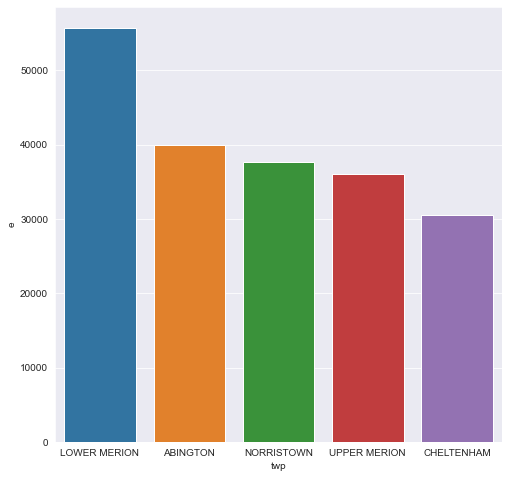

In [95]:
plt.figure(figsize=(8,8))
sns.barplot(data=data_p11_twp.iloc[:5,:], x='twp', y='e',)

<AxesSubplot:xlabel='twp', ylabel='e'>

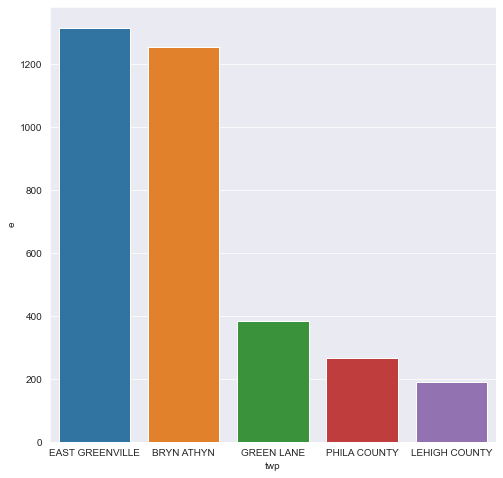

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(data=data_p11_twp.iloc[-5:,:], x='twp', y='e',)

**Obs1.**
1. LOWER MERION       
2. ABINGTON           
3. NORRISTOWN         
4. UPPER MERION       
5. CHELTENHAM         

These are the top 5 townships from where 911 calls are the maximum. LOWER MERION , being the highest from which emergency calls have been recorded the most.

1. EAST GREENVILLE	
2. BRYN ATHYN	
3. GREEN LANE	
4. PHILA COUNTY	
5. LEHIGH COUNTY	

These are the 5 townships from where least number of 911 phone calls have been received, LEHIGH COUNTY being the least. 

**Creating 2 fetaures from title i.e. title and title_subcat**

In [40]:
data_911['title'][9].partition(':')[0]

'Traffic'

In [41]:
data_911['title'][9].partition(':')[1]

':'

In [42]:
data_911['title'][9].partition(':')[2]

' VEHICLE ACCIDENT -'

In [43]:
titles=[]
titles_subcat=[]
for i in data_911.index:
    titles.append(data_911['title'][i].partition(':')[0])
    titles_subcat.append(data_911['title'][i].partition(':')[2])
print(titles[:5])
print(titles_subcat[:5])

['EMS', 'EMS', 'Fire', 'EMS', 'EMS']
[' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK', ' CARDIAC EMERGENCY', ' DIZZINESS']


In [44]:
len(titles)

663282

In [45]:
len(titles_subcat)

663282

In [46]:
data_911['title']= titles
data_911['title_subcat'] = titles_subcat

In [47]:
data_911['title'][:5]

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: title, dtype: object

In [48]:
data_911['title_subcat'][:5]

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: title_subcat, dtype: object

In [49]:
data_911['title'].nunique()

3

In [50]:
data_911['title_subcat'].nunique()

95

In [51]:
data_911['title_subcat'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE -',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' VEH

In [52]:
titles_subcat=[]
for i in data_911['title_subcat']:
    titles_subcat.append(i.strip(' -'))

data_911['title_subcat']=titles_subcat
data_911['title_subcat'].unique()

array(['BACK PAINS/INJURY', 'DIABETIC EMERGENCY', 'GAS-ODOR/LEAK',
       'CARDIAC EMERGENCY', 'DIZZINESS', 'HEAD INJURY', 'NAUSEA/VOMITING',
       'RESPIRATORY EMERGENCY', 'SYNCOPAL EPISODE', 'VEHICLE ACCIDENT',
       'DISABLED VEHICLE', 'APPLIANCE FIRE', 'GENERAL WEAKNESS',
       'CARBON MONOXIDE DETECTOR', 'UNKNOWN MEDICAL EMERGENCY',
       'UNRESPONSIVE SUBJECT', 'ALTERED MENTAL STATUS', 'FIRE ALARM',
       'CVA/STROKE', 'ROAD OBSTRUCTION', 'SUBJECT IN PAIN',
       'HEMORRHAGING', 'FALL VICTIM', 'ASSAULT VICTIM', 'SEIZURES',
       'MEDICAL ALERT ALARM', 'ABDOMINAL PAINS', 'PUMP DETAIL',
       'FIRE INVESTIGATION', 'OVERDOSE', 'MATERNITY',
       'UNCONSCIOUS SUBJECT', 'CHOKING', 'LACERATIONS',
       'TRASH/DUMPSTER FIRE', 'UNKNOWN TYPE FIRE', 'BUILDING FIRE',
       'ELECTRICAL FIRE OUTSIDE', 'DEBRIS/FLUIDS ON HIGHWAY', 'FEVER',
       'ALLERGIC REACTION', 'VEHICLE LEAKING FUEL', 'FRACTURE',
       'BURN VICTIM', 'RESCUE - GENERAL', 'WOODS/FIELD FIRE',
       'FIRE SPECIAL

In [53]:
data_911['title_subcat'].nunique()

88

In [54]:
data_911_title = data_911.groupby(['title'], as_index=False)['e'].sum().sort_values(by='e',ascending=False)
data_911_title

,title,e
0,EMS,332591
2,Traffic,230115
1,Fire,100576


In [55]:
data_911_title_subcat = data_911.groupby(['title_subcat'], as_index=False)['e'].sum().sort_values(by='e',ascending=False)
data_911_title_subcat

,title_subcat,e
83,VEHICLE ACCIDENT,184679
24,DISABLED VEHICLE,47897
34,FIRE ALARM,38436
32,FALL VICTIM,34670
64,RESPIRATORY EMERGENCY,34237
...,...,...
72,SUICIDE ATTEMPT,2
38,FOOT PATROL,1
47,HIT + RUN,1
6,ANIMAL COMPLAINT,1


<AxesSubplot:xlabel='title', ylabel='e'>

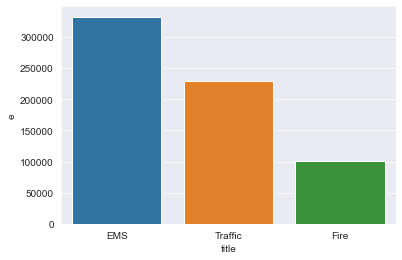

In [56]:
sns.barplot(data=data_911_title, x='title', y='e')

**Obs2. EMS is the most title of emergency while Fire is the least**

In [57]:
data_titleandtitle_subcat = data_911.groupby(['title','title_subcat'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)

In [58]:
data_titleandtitle_subcat[:20]

,title,title_subcat,e
145,Traffic,VEHICLE ACCIDENT,148315
142,Traffic,DISABLED VEHICLE,47889
98,Fire,FIRE ALARM,38320
31,EMS,FALL VICTIM,34663
59,EMS,RESPIRATORY EMERGENCY,34235
17,EMS,CARDIAC EMERGENCY,32321
76,EMS,VEHICLE ACCIDENT,25507
144,Traffic,ROAD OBSTRUCTION,23225
65,EMS,SUBJECT IN PAIN,19643
41,EMS,HEAD INJURY,18296


In [59]:
data_titleandtitle_subcat[-20:]

,title,title_subcat,e
123,Fire,ROAD OBSTRUCTION,2
122,Fire,RESPIRATORY EMERGENCY,2
110,Fire,NAUSEA/VOMITING,2
127,Fire,SUICIDE ATTEMPT,2
128,Fire,SUSPICIOUS,1
113,Fire,POISONING,1
102,Fire,FOOT PATROL,1
104,Fire,GENERAL WEAKNESS,1
44,EMS,HIT + RUN,1
93,Fire,DIZZINESS,1


**Among the title there are sub categories describing the type.Based on that I observe the following:**
**Obs3.**
1. Although EMS is the major title of emergency , VEHICLE ACCIDENT in Traffic is the most reported emergency among the sub categories 
2. Among EMS , the highest is the category FALL VICTIM 
3. Among Traffic , the highest is surely VEHICLE ACCIDENT
4. Among Fire, the FIRE ALARM category has the major emergency calls.

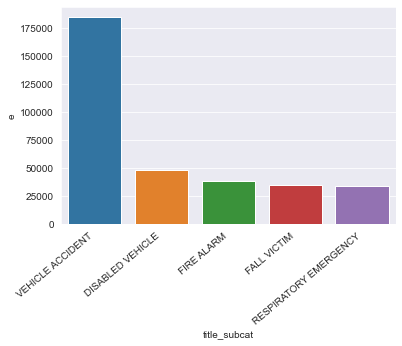

In [60]:
azx= sns.barplot(data=data_911_title_subcat[:5], x='title_subcat', y='e')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)

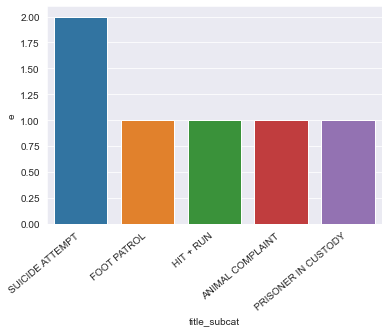

In [61]:
azx=sns.barplot(data=data_911_title_subcat[-5:], x='title_subcat', y='e')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)

**Also as is clear from Obs3. that:**
1. VEHICLE ACCIDENT	
2. DISABLED VEHICLE	
3. FIRE ALARM	
4. FALL VICTIM	
5. RESPIRATORY EMERGENCY 

The above series is arranged in descending order based on number of emergency calls. Clearly VEHICLE ACCIDENT tops the list. The list gives us the top five title sub categories of Emergency

1. SUICIDE ATTEMPT	
2. FOOT PATROL	
3. HIT + RUN	
4. ANIMAL COMPLAINT	
5. PRISONER IN CUSTODY	

The above series is arranged in descending order based on number of emergency calls. Clearly PRISONER IN CUSTODY is the sub category which has the least number of emergency calls. The list gives us the bottom five title categories of Emergency.

In [62]:
data_911_month = data_911.groupby('month', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_month

,month,e
4,Jan,62312
6,Jun,60020
7,Mar,60015
5,Jul,59823
2,Dec,57677
8,May,57488
3,Feb,55423
0,Apr,53560
10,Oct,51239
9,Nov,50176


In [100]:
data_911_month_title = data_911.groupby(['month','title'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_month_title

,month,title,e
12,Jan,EMS,30958
15,Jul,EMS,30026
21,Mar,EMS,29982
18,Jun,EMS,29506
24,May,EMS,29464
6,Dec,EMS,28769
0,Apr,EMS,28437
9,Feb,EMS,28329
30,Oct,EMS,25024
3,Aug,EMS,24409


<AxesSubplot:xlabel='month', ylabel='e'>

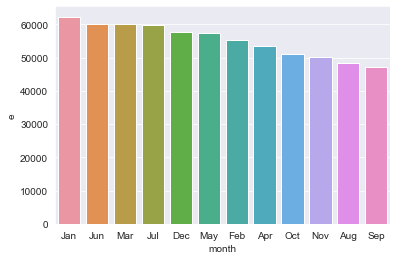

In [63]:
sns.barplot(data=data_911_month, x='month', y='e')

<AxesSubplot:xlabel='month', ylabel='e'>

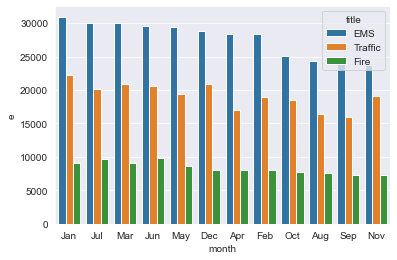

In [101]:
sns.barplot(data=data_911_month_title, x='month', y='e',hue='title')

In [64]:
data_911_year = data_911.groupby('year', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_year

,year,e
3,2018,151515
4,2019,148978
1,2016,142334
2,2017,140319
5,2020,72231
0,2015,7905


<AxesSubplot:xlabel='year', ylabel='e'>

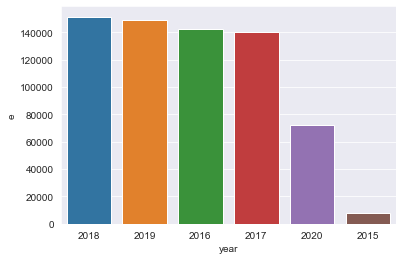

In [65]:
sns.barplot(data=data_911_year, x='year', y='e')

In [118]:
data_911_year = data_911.groupby('year', as_index=False)['e'].sum().sort_values(by='year', ascending=False)
data_911_year

,year,e
5,2020,72231
4,2019,148978
3,2018,151515
2,2017,140319
1,2016,142334
0,2015,7905


<AxesSubplot:xlabel='year', ylabel='e'>

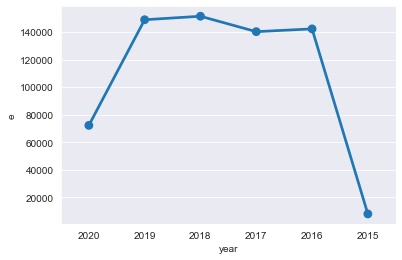

In [119]:
sns.pointplot(data=data_911_year, x='year', y='e')

In [102]:
data_911_year_title = data_911.groupby(['year','title'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_year_title

,year,title,e
12,2019,EMS,74952
9,2018,EMS,72582
6,2017,EMS,71044
3,2016,EMS,70112
11,2018,Traffic,55811
14,2019,Traffic,51778
5,2016,Traffic,50647
8,2017,Traffic,48730
15,2020,EMS,40008
10,2018,Fire,23122


<AxesSubplot:xlabel='year', ylabel='e'>

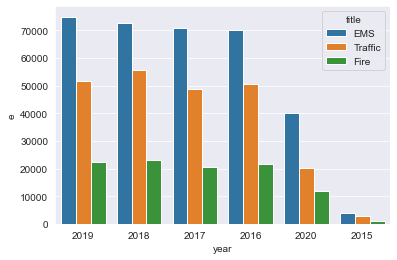

In [103]:
sns.barplot(data=data_911_year_title, x='year', y='e',hue='title')

In [66]:
data_911_year_month = data_911.groupby(['year','month'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_year_month

,year,month,e
32,2018,Mar,14922
34,2018,Nov,14093
47,2019,Oct,13425
42,2019,Jul,13161
29,2018,Jan,13123
5,2016,Jan,13094
35,2018,Oct,12975
15,2017,Dec,12940
45,2019,May,12819
33,2018,May,12550


<AxesSubplot:xlabel='month', ylabel='e'>

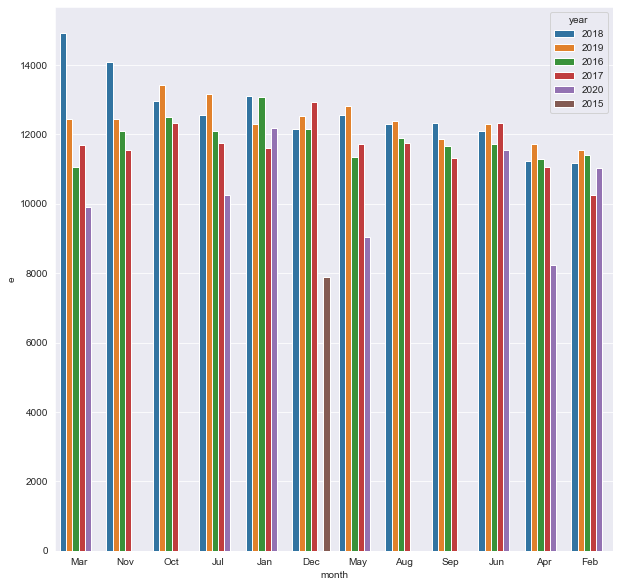

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(data=data_911_year_month, x='month', y='e', hue='year')

**Obs4.**
1. The highest emergency calls are recorded in January over the 5 years(2015-2020) while the least has been recorded in September
2. However, in every month the EMS category of emergency topped the list.
3. Among these 5 years the bighest number of emergency calls were recorded in 2018. From 2015 the emergency calls increased till 2018 with an exception in 2017 but post 2018 it has decreased. So I find an improvement over the years especially from 2018.(<em>This trend is visible from the pointplot also</em>)
4. Among the years , one thing is coomon i.e. EMS category shows the highest number of emergency calls. Fire ids the least.
5. In 2018, March and November recorded the highest emergency calls. 

In [68]:
data_911_pod = data_911.groupby('part_of_day', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_pod

,part_of_day,e
0,Afternoon,205233
2,Morning,199306
1,Evening,141891
3,Night,116852


<AxesSubplot:xlabel='part_of_day', ylabel='e'>

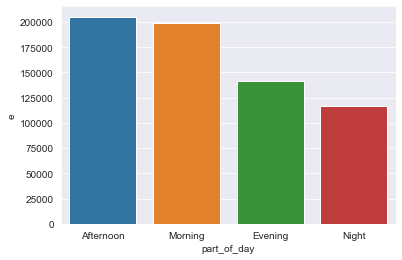

In [69]:
sns.barplot(data=data_911_pod, x='part_of_day', y='e')

In [104]:
data_911_pod_title = data_911.groupby(['part_of_day','title'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_pod_title

,part_of_day,title,e
6,Morning,EMS,102193
0,Afternoon,EMS,94278
2,Afternoon,Traffic,81158
9,Night,EMS,70259
8,Morning,Traffic,68581
3,Evening,EMS,65861
5,Evening,Traffic,52377
1,Afternoon,Fire,29797
7,Morning,Fire,28532
11,Night,Traffic,27999


<AxesSubplot:xlabel='part_of_day', ylabel='e'>

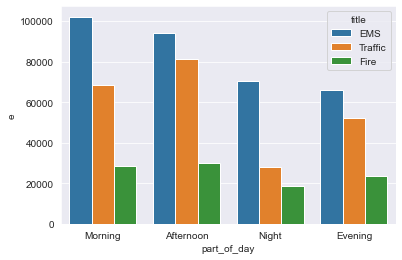

In [106]:
sns.barplot(data=data_911_pod_title, x='part_of_day', y='e',hue='title')

**Obs5.**

1. Morning and Afternoon records the highest number of emergency calls in a day. The number reduced drastically during night.
2. Among the parts of day, clearly EMS is the highest emergency call category while Fire is the least.

In [70]:
data_911_dow = data_911.groupby('dow', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_dow

,dow,e
0,Fri,102902
6,Wed,99126
4,Thur,98637
5,Tue,97651
1,Mon,96722
2,Sat,89414
3,Sun,78830


<AxesSubplot:xlabel='dow', ylabel='e'>

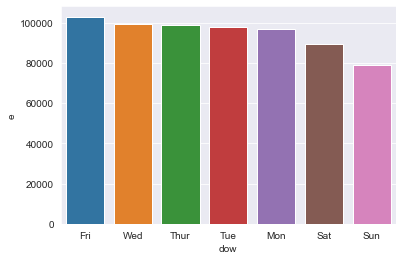

In [71]:
sns.barplot(data=data_911_dow, x='dow', y='e')

In [107]:
data_911_dow_title = data_911.groupby(['dow','title'], as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_dow_title

,dow,title,e
0,Fri,EMS,49352
3,Mon,EMS,48737
15,Tue,EMS,48361
18,Wed,EMS,48027
12,Thur,EMS,47602
6,Sat,EMS,46420
9,Sun,EMS,44092
2,Fri,Traffic,38231
14,Thur,Traffic,36431
20,Wed,Traffic,36084


<AxesSubplot:xlabel='dow', ylabel='e'>

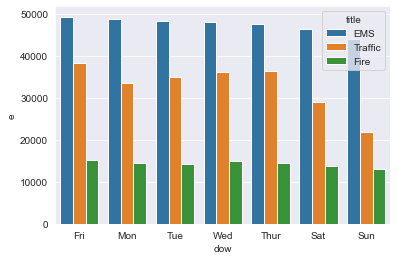

In [108]:
sns.barplot(data=data_911_dow_title, x='dow', y='e',hue='title')

**Obs6.**
1. In a week, Friday records the highest number of Emergency calls 
2. Consider 3 groups : 
a. early_week = {Mon,Tue}
b. mid_day = Wed
c. later_week = {Thurs, Fri}
d. Weekend={Sat, Sun}.
Clearly, from the above table , the mid_day and the later_week recorded more emergency calls than the early_week. Also notice that the difference in emergency calls number is much more in weekends than in weekdays
3. Among the days of week . EMS tops the list and Fire is at the bottom of the categories with the most emergencu=y calls. Strangely, I see that for Fire the number of cases in almost constant for the days of week over the entire span of 5 years.  

In [72]:
data_911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663282 entries, 0 to 663521
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lat           663282 non-null  object        
 1   lng           663282 non-null  object        
 2   desc          663282 non-null  object        
 3   zip           663282 non-null  object        
 4   title         663282 non-null  object        
 5   twp           663282 non-null  object        
 6   addr          663282 non-null  object        
 7   e             663282 non-null  int64         
 8   date          663282 non-null  datetime64[ns]
 9   month         663282 non-null  object        
 10  year          663282 non-null  object        
 11  part_of_day   663282 non-null  object        
 12  dow           663282 non-null  object        
 13  title_subcat  663282 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 61.5+ MB


In [73]:
data_911_zip = data_911.groupby('zip', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_zip

,zip,e
204,nan,80165
136,19401.0,45583
161,19464.0,43900
137,19403.0,34874
153,19446.0,32257
...,...,...
15,18040.0,1
12,17901.0,1
11,17810.0,1
79,19054.0,1


While analyzing, zip is found to have many null values but not recognized since it is not of the form of np.nan

Hence I apply the following set of codes:

In [74]:
zip_map ={'nan':np.nan}
data_911['zip'].replace(zip_map, inplace=True)

data_911.isnull().mean()

lat             0.000000
lng             0.000000
desc            0.000000
zip             0.120861
title           0.000000
twp             0.000000
addr            0.000000
e               0.000000
date            0.000000
month           0.000000
year            0.000000
part_of_day     0.000000
dow             0.000000
title_subcat    0.000000
dtype: float64

So, 12.1% of the values in zip are missing

Let us view the distribution of zip now 

In [75]:
# first convert it to a str 
data_911=data_911.astype({'zip':str})
data_911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663282 entries, 0 to 663521
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lat           663282 non-null  object        
 1   lng           663282 non-null  object        
 2   desc          663282 non-null  object        
 3   zip           663282 non-null  object        
 4   title         663282 non-null  object        
 5   twp           663282 non-null  object        
 6   addr          663282 non-null  object        
 7   e             663282 non-null  int64         
 8   date          663282 non-null  datetime64[ns]
 9   month         663282 non-null  object        
 10  year          663282 non-null  object        
 11  part_of_day   663282 non-null  object        
 12  dow           663282 non-null  object        
 13  title_subcat  663282 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 61.5+ MB


In [76]:
data_911_zip = data_911.groupby('zip', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_zip

,zip,e
204,nan,80165
136,19401.0,45583
161,19464.0,43900
137,19403.0,34874
153,19446.0,32257
...,...,...
15,18040.0,1
12,17901.0,1
11,17810.0,1
79,19054.0,1


zip must be related to township or area

**For the treatment of zip I will do the following steps**
1. Since the zip is related to twp(township) I will group the data by twp and find out the zip codes corresponding to each township.
2. After that I will identify the zip code which has the maximum count for each twp
3. Next, I will create a list for each twp such that the mode zip(i.e. zip for a praticular twp from which emergency calls received is maximum) for each twp is the first element
4. After that , I will run a loop and replace each nan values of the zip object with the mode zip of that particular twp which the observation has. Here , if the mode zip is nan then I will replace that by the second mode zip. 

In [77]:
list_twp = sorted(list(data_911['twp'].unique()))

In [78]:
list_twp

['ABINGTON',
 'AMBLER',
 'BERKS COUNTY',
 'BRIDGEPORT',
 'BRYN ATHYN',
 'BUCKS COUNTY',
 'CHELTENHAM',
 'CHESTER COUNTY',
 'COLLEGEVILLE',
 'CONSHOHOCKEN',
 'DELAWARE COUNTY',
 'DOUGLASS',
 'EAST GREENVILLE',
 'EAST NORRITON',
 'FRANCONIA',
 'GREEN LANE',
 'HATBORO',
 'HATFIELD BORO',
 'HATFIELD TOWNSHIP',
 'HORSHAM',
 'JENKINTOWN',
 'LANSDALE',
 'LEHIGH COUNTY',
 'LIMERICK',
 'LOWER FREDERICK',
 'LOWER GWYNEDD',
 'LOWER MERION',
 'LOWER MORELAND',
 'LOWER POTTSGROVE',
 'LOWER PROVIDENCE',
 'LOWER SALFORD',
 'MARLBOROUGH',
 'MONTGOMERY',
 'NARBERTH',
 'NEW HANOVER',
 'NORRISTOWN',
 'NORTH WALES',
 'PENNSBURG',
 'PERKIOMEN',
 'PHILA COUNTY',
 'PLYMOUTH',
 'POTTSTOWN',
 'RED HILL',
 'ROCKLEDGE',
 'ROYERSFORD',
 'SALFORD',
 'SCHWENKSVILLE',
 'SKIPPACK',
 'SOUDERTON',
 'SPRINGFIELD',
 'TELFORD',
 'TOWAMENCIN',
 'TRAPPE',
 'UPPER DUBLIN',
 'UPPER FREDERICK',
 'UPPER GWYNEDD',
 'UPPER HANOVER',
 'UPPER MERION',
 'UPPER MORELAND',
 'UPPER POTTSGROVE',
 'UPPER PROVIDENCE',
 'UPPER SALFORD',
 '

In [79]:
df_bytwp = data_911.groupby(['twp'])['zip'].value_counts()
df_bytwp

twp        zip    
ABINGTON   19046.0    11938
           19001.0     9875
           19038.0     6292
           19090.0     4560
           19006.0     2827
                      ...  
WORCESTER  19423.0       25
           19490.0       15
           19438.0        7
           19473.0        2
           18054.0        1
Name: zip, Length: 1109, dtype: int64

In [80]:
df_bytwp.index

MultiIndex([( 'ABINGTON', '19046.0'),
            ( 'ABINGTON', '19001.0'),
            ( 'ABINGTON', '19038.0'),
            ( 'ABINGTON', '19090.0'),
            ( 'ABINGTON', '19006.0'),
            ( 'ABINGTON', '19027.0'),
            ( 'ABINGTON',     'nan'),
            ( 'ABINGTON', '19095.0'),
            ( 'ABINGTON', '19111.0'),
            ( 'ABINGTON', '19009.0'),
            ...
            ('WORCESTER', '19403.0'),
            ('WORCESTER', '19426.0'),
            ('WORCESTER',     'nan'),
            ('WORCESTER', '19422.0'),
            ('WORCESTER', '19454.0'),
            ('WORCESTER', '19423.0'),
            ('WORCESTER', '19490.0'),
            ('WORCESTER', '19438.0'),
            ('WORCESTER', '19473.0'),
            ('WORCESTER', '18054.0')],
           names=['twp', 'zip'], length=1109)

In [81]:
zip_code=[]
j=0
list_zip=[]
for i in range(0,1042):
    if df_bytwp.index[i][0]==list_twp[j]:
        if df_bytwp.index[i][1]!='nan':
            list_zip.append(df_bytwp.index[i][1])
        else:
            continue
    else:
        print('the zip codes for {} are {}'.format(list_twp[j], list_zip))
        print(' ')
        j+=1
        if df_bytwp.index[i][1]!='nan':
            list_zip=[df_bytwp.index[i][1]]
        else:
            list_zip=[]

the zip codes for ABINGTON are ['19046.0', '19001.0', '19038.0', '19090.0', '19006.0', '19027.0', '19095.0', '19111.0', '19009.0', '19002.0', '19025.0', '19040.0', '19075.0', '19012.0', '19115.0', '19044.0', '19087.0', '19401.0', '19031.0', '19035.0', '19406.0', '19438.0', '18054.0', '18940.0', '18964.0', '19118.0', '19348.0', '19428.0', '19444.0', '19446.0', '19468.0']
 
the zip codes for AMBLER are ['19002.0', '19107.0', '17506.0', '18054.0', '19001.0', '19004.0', '19031.0']
 
the zip codes for BERKS COUNTY are ['19512.0', '19518.0', '19505.0', '19504.0', '18056.0', '19503.0', '19464.0', '18070.0', '19601.0', '18092.0', '19610.0', '19426.0', '19027.0', '19525.0', '19609.0', '19401.0', '19460.0', '19465.0', '19605.0', '18011.0', '18054.0', '18073.0', '18076.0', '18964.0', '19001.0', '19046.0', '19403.0', '19404.0', '19422.0', '19428.0', '19438.0', '19446.0', '19468.0', '19543.0', '19545.0', '19602.0', '19604.0']
 
the zip codes for BRIDGEPORT are ['19405.0', '19406.0', '19401.0', '194

In [84]:
zip_code=[]
j=0
list_zip=[]
for i in range(0,1042):
    if df_bytwp.index[i][0]==list_twp[j]:
        if df_bytwp.index[i][1]!='nan':
            list_zip.append(df_bytwp.index[i][1])
        else:
            continue
    else:
        for k in data_911.index:
            if data_911['zip'][k]!='nan':
                continue
            else:
                if data_911['twp'][k] == list_twp[j]:
                    data_911['zip'][k]=data_911['zip'][k].replace(data_911['zip'][k],list_zip[0])
        j+=1
        if df_bytwp.index[i][1]!='nan':
            list_zip=[df_bytwp.index[i][1]]
        else:
            list_zip=[]

<ipython-input-84-faa455450e71>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_911['zip'][k]=data_911['zip'][k].replace(data_911['zip'][k],list_zip[0])


In [85]:
data_911_zip = data_911.groupby('zip', as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_zip

,zip,e
136,19401.0,47766
161,19464.0,46446
137,19403.0,36313
153,19446.0,35162
140,19406.0,33507
...,...,...
15,18040.0,1
12,17901.0,1
11,17810.0,1
79,19054.0,1


In [87]:
data_911.head()

,lat,lng,desc,zip,title,twp,addr,e,date,month,year,part_of_day,dow,title_subcat
0,40.297875899999994,-75.5812935,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10,Dec,2015,Evening,Thur,BACK PAINS/INJURY
1,40.2580614,-75.26467990000002,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10,Dec,2015,Evening,Thur,DIABETIC EMERGENCY
2,40.121181799999995,-75.3519752,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,NORRISTOWN,HAWS AVE,1,2015-12-10,Dec,2015,Afternoon,Thur,GAS-ODOR/LEAK
3,40.116153000000004,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,Dec,2015,Afternoon,Thur,CARDIAC EMERGENCY
4,40.251492,-75.6033497,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10,Dec,2015,Afternoon,Thur,DIZZINESS


**Note**
1. the zip codes for LOWER POTTSGROVE are ['19464.0', '19403.0', '19401.0', '18054.0', '18976.0', '19406.0', '19440.0', '19462.0']
2. Observation 4 had a nan value in zip. It has been replaced by 19464.0 which is clearly what I intended i.e. to replace the nan value of a zip with the mode zip of that particular twp. 

In [92]:
data_911_zip=data_911.groupby(['zip','twp'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_zip

,zip,twp,e
592,19401.0,NORRISTOWN,37059
664,19406.0,UPPER MERION,33091
893,19464.0,POTTSTOWN,27206
615,19403.0,LOWER PROVIDENCE,19585
240,19004.0,LOWER MERION,16263
...,...,...,...
541,19147.0,CONSHOHOCKEN,1
542,19147.0,UPPER MERION,1
544,19150.0,LOWER MERION,1
547,19151.0,DELAWARE COUNTY,1


<AxesSubplot:xlabel='zip', ylabel='e'>

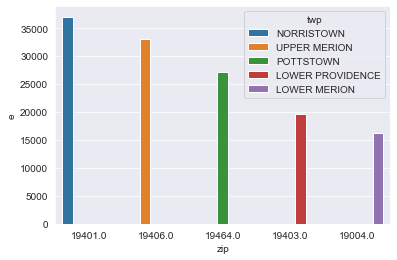

In [93]:
sns.barplot(data=data_911_zip[:5],x='zip',y='e',hue='twp')

<AxesSubplot:xlabel='zip', ylabel='e'>

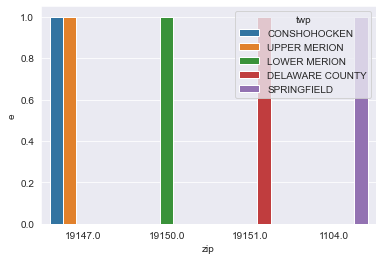

In [99]:
sns.barplot(data=data_911_zip[-5:],x='zip',y='e',hue='twp')

**Obs7.**
1. 19401.0 is the zip code which has the maximum emergency calls recorded.
2. Note here that when we come to individual zip codes within a township(twp) , Upper Merion no longer tops the list , it is now done by Norristown. 
3. Lowest emergency calls is from 1104.0 from Springfield.

In [131]:
data_911['addr'].nunique()

41292

In [133]:
data_911_addr=data_911.groupby(['addr'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_addr

,addr,e
33096,SHANNONDELL DR & SHANNONDELL BLVD,7282
21123,MAIN ST & OLD SUMNEYTOWN PIKE,2575
35920,THE FAIRWAY & RYDAL RD,1983
10736,EAGLEVILLE RD & SUNDERLAND DR,1618
11705,EVERGREEN RD & W LIGHTCAP RD,1591
...,...,...
27590,PHEASANT,1
34373,STATION 57 PLOT,1
34374,STATION ALY,1
34375,STATION ALY & W RELIANCE RD,1


In [136]:
data_911_aadr_zip_twp=data_911.groupby(['zip','addr','twp'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_aadr_zip_twp[:10]

,zip,addr,twp,e
24477,19403.0,SHANNONDELL DR & SHANNONDELL BLVD,LOWER PROVIDENCE,7282
31427,19438.0,MAIN ST & OLD SUMNEYTOWN PIKE,LOWER SALFORD,2575
16722,19046.0,THE FAIRWAY & RYDAL RD,ABINGTON,1983
23363,19403.0,EAGLEVILLE RD & SUNDERLAND DR,LOWER PROVIDENCE,1618
39218,19464.0,EVERGREEN RD & W LIGHTCAP RD,LOWER POTTSGROVE,1567
21712,19401.0,GERMANTOWN PIKE & HANNAH AVE,EAST NORRITON,1556
25804,19406.0,GULPH RD & KIRK AVE,UPPER MERION,1440
42249,19468.0,BLACK ROCK RD & S TRAPPE RD,UPPER PROVIDENCE,1425
14056,19040.0,DAVISVILLE RD & PENNYPACK RD,UPPER MORELAND,1367
26565,19406.0,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,UPPER MERION,1284


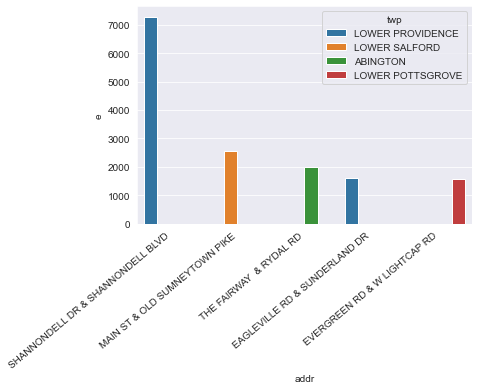

In [146]:
azx=sns.barplot(data=data_911_aadr_zip_twp[:5],x='addr',y='e',hue='twp')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)

**Obs8.**
1. Lower Merion is the township which has recorded the highest emergency calls 
2. Diving deep , we found that that on the basis of zip codes , Norristown has recorded the highest number of emergency calls.
3. Diving furthur deep, i.e. zooming in, I find that SHANNONDELL DR & SHANNONDELL BLVD	 from LOWER PROVIDENCE has recorded the highest calls. 

In [142]:
data_911_aadr_zip_twp_title=data_911.groupby(['zip','addr','twp','title'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
data_911_aadr_zip_twp_title[:10]

,zip,addr,twp,title,e
42975,19403.0,SHANNONDELL DR & SHANNONDELL BLVD,LOWER PROVIDENCE,EMS,7111
54855,19438.0,MAIN ST & OLD SUMNEYTOWN PIKE,LOWER SALFORD,EMS,2353
29279,19046.0,THE FAIRWAY & RYDAL RD,ABINGTON,EMS,1687
68137,19464.0,EVERGREEN RD & W LIGHTCAP RD,LOWER POTTSGROVE,EMS,1498
41073,19403.0,EAGLEVILLE RD & SUNDERLAND DR,LOWER PROVIDENCE,EMS,1496
73132,19468.0,BLACK ROCK RD & S TRAPPE RD,UPPER PROVIDENCE,EMS,1252
24545,19040.0,DAVISVILLE RD & PENNYPACK RD,UPPER MORELAND,EMS,1238
38010,19401.0,GERMANTOWN PIKE & HANNAH AVE,EAST NORRITON,EMS,1219
46546,19406.0,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,UPPER MERION,Traffic,1167
4419,18964.0,SUMMIT ST & COLONIAL AVE,FRANCONIA,EMS,1157


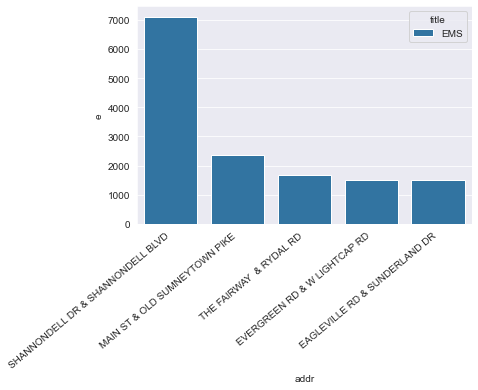

In [145]:
azx=sns.barplot(data=data_911_aadr_zip_twp_title[:5],x='addr',y='e',hue='title')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)

**Obs9.**
EMS is the category that has resulted in highest number of emergency calls even at the base level 

Order : twp --> zip --> addr
1. For twp ,EMS is highest category which recorded the most emergency calls. In one case I get Traffic category.
2. For zip, EMS is highest category which recorded the most emergency calls. In one case I get Traffic category.
3. EMS is the category that has resulted in highest number of emergency calls even at the base level 

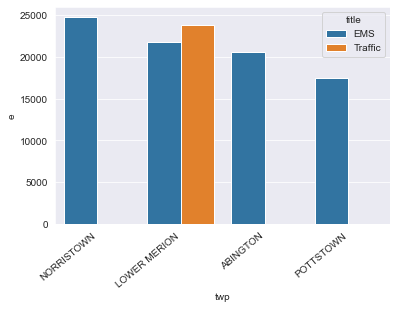

In [151]:
data_911_twp_title=data_911.groupby(['twp','title'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
azx=sns.barplot(data=data_911_twp_title[:5],x='twp',y='e',hue='title')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)

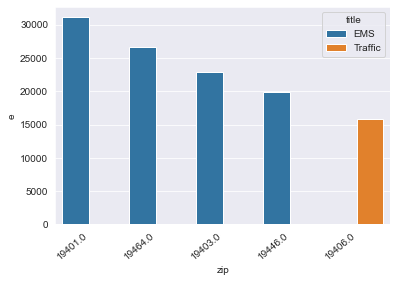

In [155]:
data_911_zip_title=data_911.groupby(['zip','title'],as_index=False)['e'].sum().sort_values(by='e', ascending=False)
azx=sns.barplot(data=data_911_zip_title[:5],x='zip',y='e',hue='title')
azx.set_xticklabels(azx.get_xticklabels(), rotation=40, 
                                    ha="right")
plt.show(azx)